<a href="https://colab.research.google.com/github/Ousoka/prix_voiture_audi_dl/blob/master/PriceEstimator_FBD_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/DeepLearning/02-UAM/Datasets/')

['prix_voiture_audi.xls']

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/DeepLearning/02-UAM/Datasets/prix_voiture_audi.xls')
df.head()

,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
df.describe()

,annee,prix,miles,taxe,distance,moteur
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [ ]:

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   annee         10668 non-null  int64  
 2   prix          10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   miles         10668 non-null  int64  
 5   carburant     10668 non-null  object 
 6   taxe          10668 non-null  int64  
 7   distance      10668 non-null  float64
 8   moteur        10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.4 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   annee         10668 non-null  int64  
 2   prix          10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   miles         10668 non-null  int64  
 5   carburant     10668 non-null  object 
 6   taxe          10668 non-null  int64  
 7   distance      10668 non-null  float64
 8   moteur        10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [ ]:
df.duplicated().count()

np.int64(10668)

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10565 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10565 non-null  object 
 1   annee         10565 non-null  int64  
 2   prix          10565 non-null  int64  
 3   transmission  10565 non-null  object 
 4   miles         10565 non-null  int64  
 5   carburant     10565 non-null  object 
 6   taxe          10565 non-null  int64  
 7   distance      10565 non-null  float64
 8   moteur        10565 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 825.4+ KB


In [ ]:
df.shape

(10565, 9)

In [ ]:
col_num=df.select_dtypes(include='number').columns
col_num

Index(['annee', 'prix', 'miles', 'taxe', 'distance', 'moteur'], dtype='object')

In [ ]:
col_cat=df.select_dtypes(include='object').columns
col_cat

Index(['model', 'transmission', 'carburant'], dtype='object')

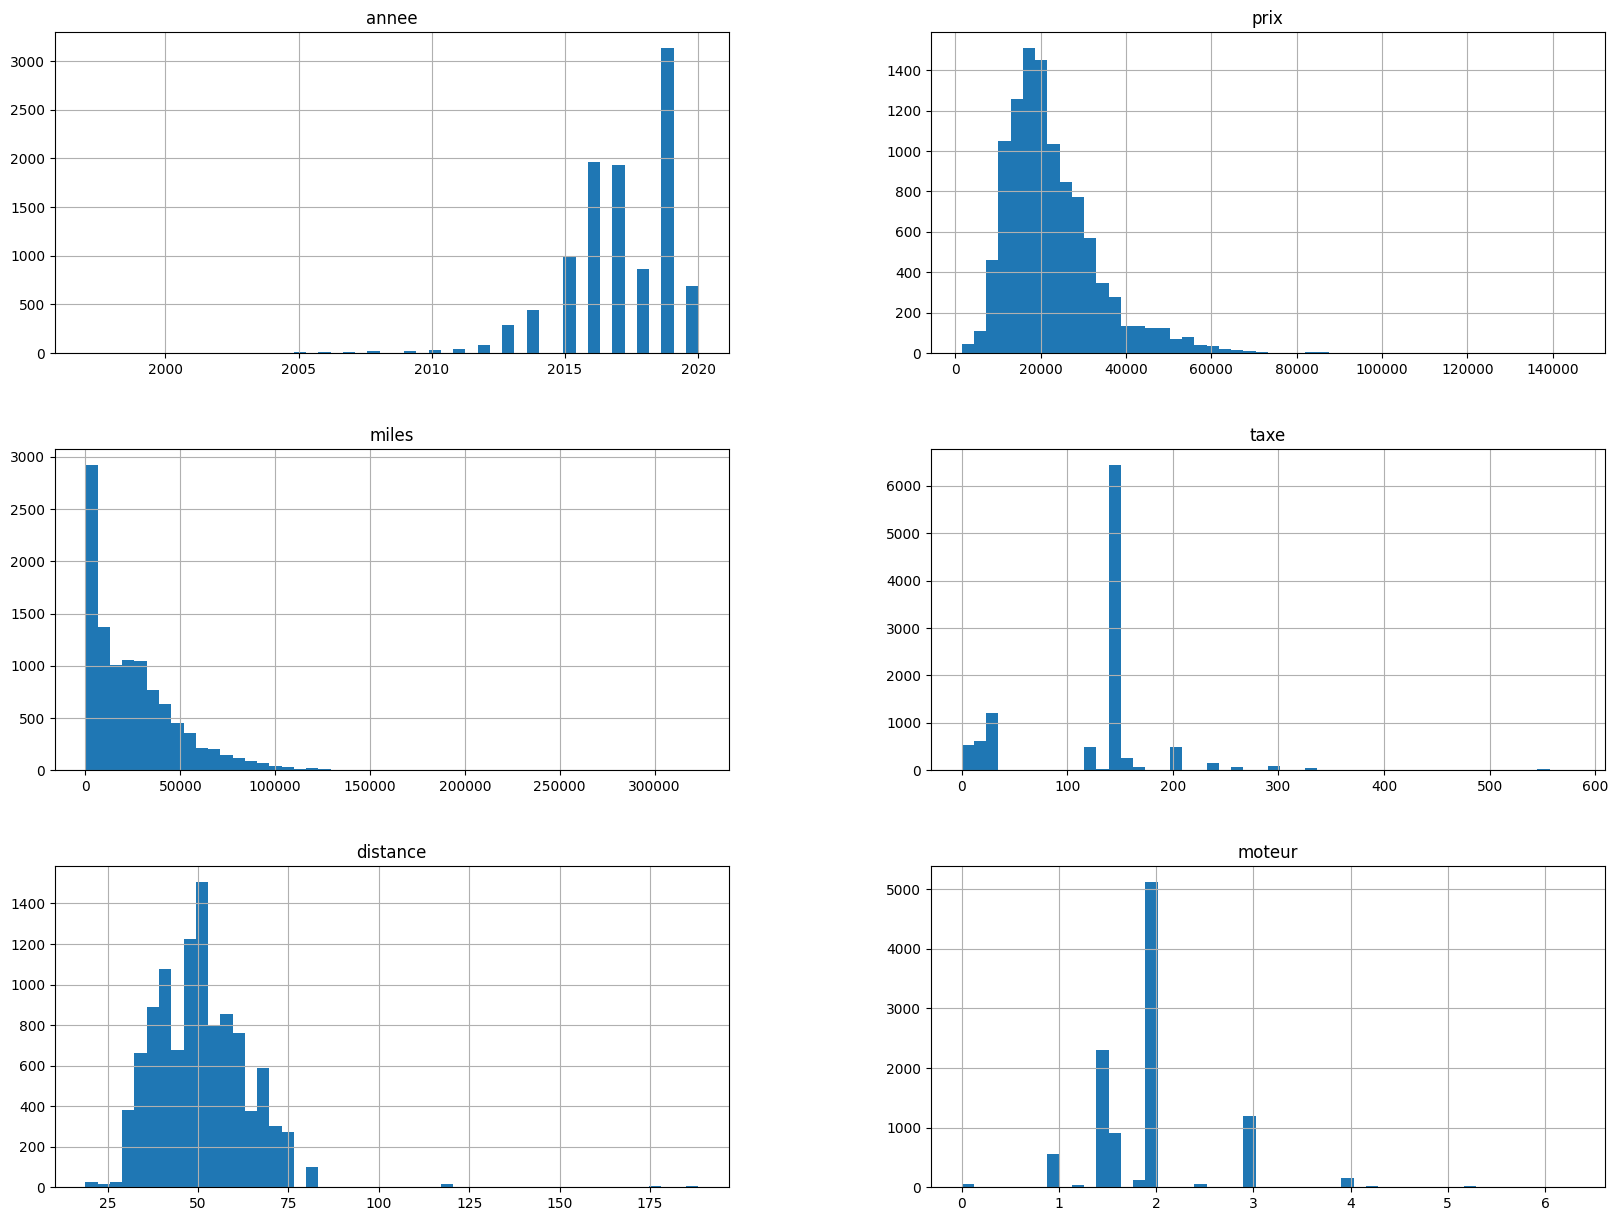

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

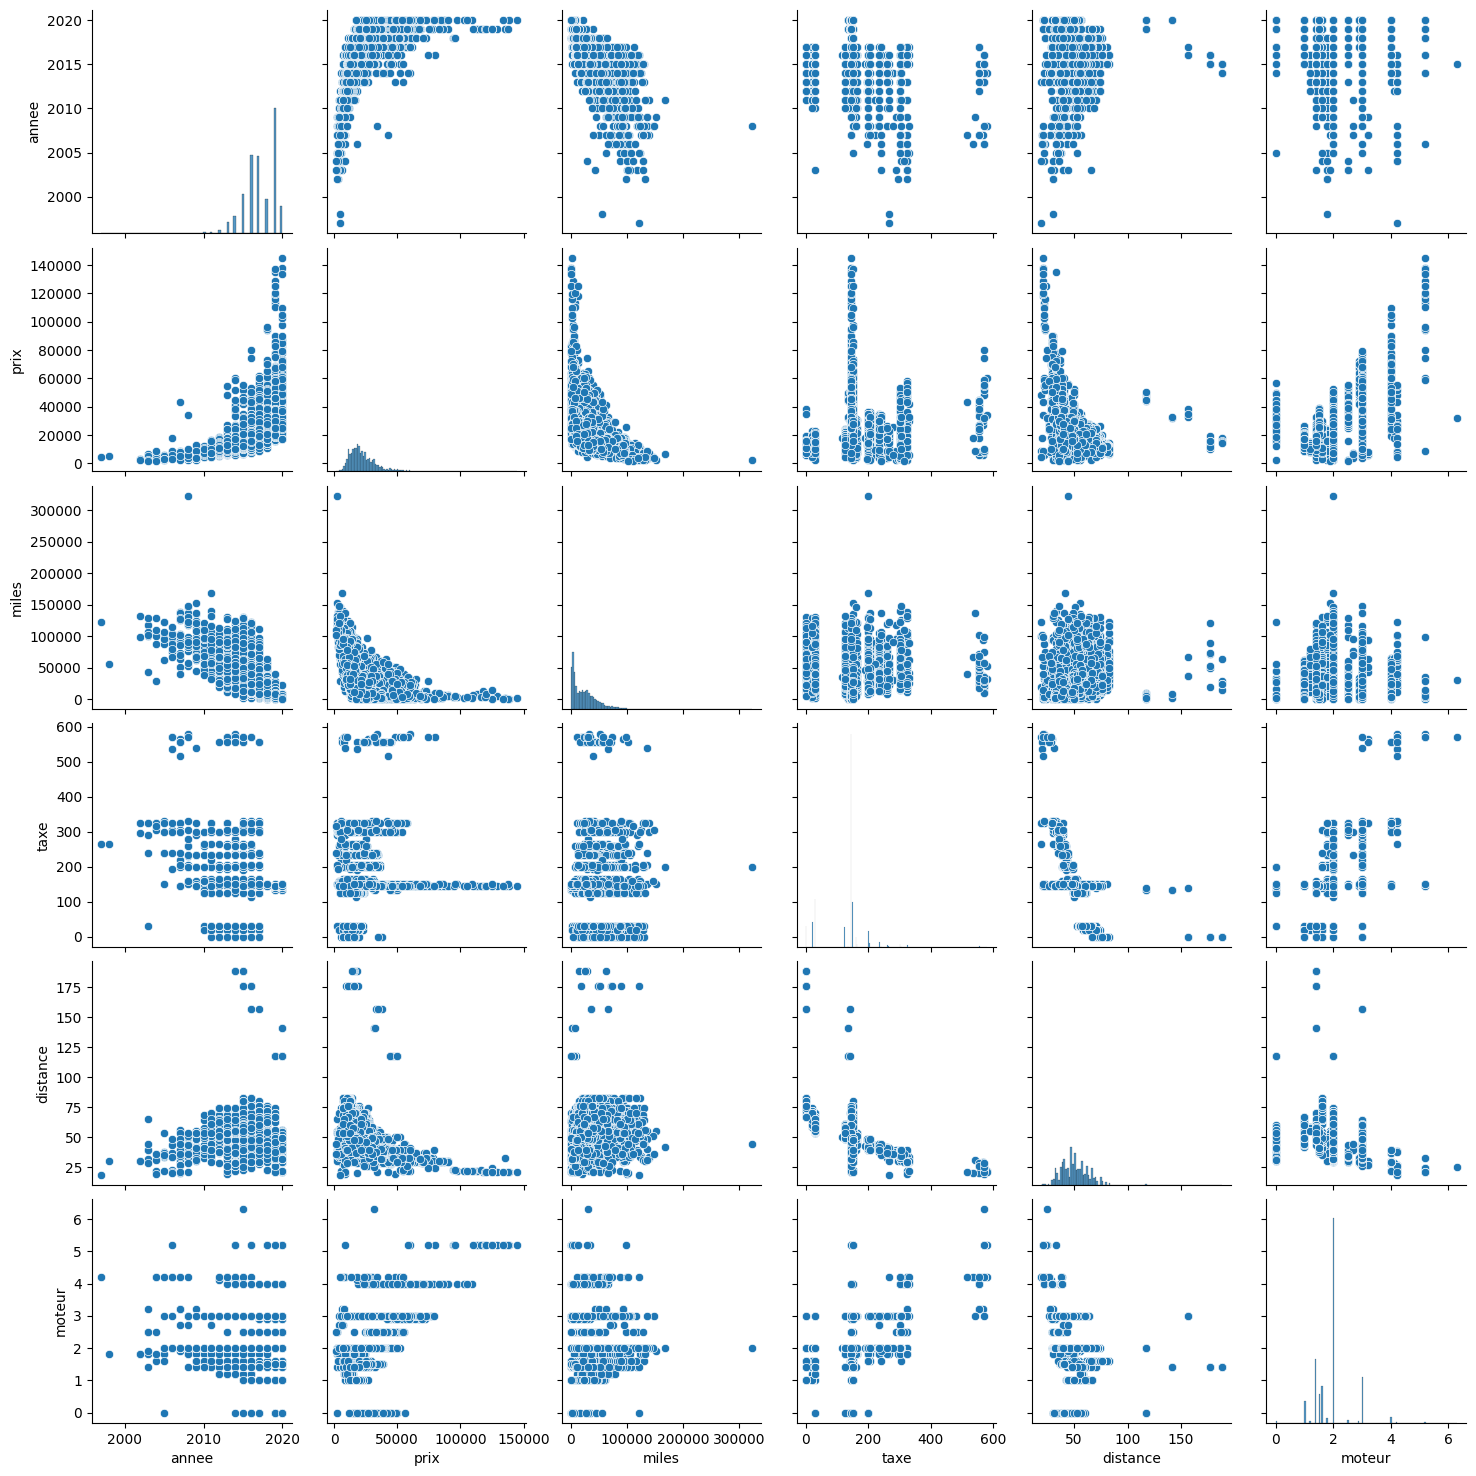

In [ ]:
import seaborn as sns
# annee miles model
sns.pairplot(df[col_num])

Pourcentage de vente de vehicules pour chanque modele
quels sont les modeles qui representent plus de 80% des ventes

In [ ]:
ventes_par_model=df['model'].value_counts(normalize=True).sort_values(ascending=False)
ventes_par_model

,proportion
model,
A3,0.181448
Q3,0.130525
A4,0.130147
A1,0.126550
A5,0.082726
Q5,0.081779
Q2,0.076668
A6,0.070800
Q7,0.037293


In [ ]:
som_pourcentage=ventes_par_model.cumsum()
som_pourcentage
majorités_ventes=som_pourcentage[som_pourcentage>=0.8]
majorités_ventes

,proportion
model,
Q2,0.809844
A6,0.880644
Q7,0.917937
TT,0.949740
A7,0.961287
A8,0.972456
Q8,0.978987
RS6,0.982679
RS3,0.985802


In [ ]:
model_cher=df[df["prix"]==df["prix"].max()]
model_cher

,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2


In [ ]:
df.columns

Index(['model', 'annee', 'prix', 'transmission', 'miles', 'carburant', 'taxe',
       'distance', 'moteur'],
      dtype='object')

In [ ]:
for i in col_cat:
  # print(i)
  print(df[i].value_counts())
  # print(df[i].values)

model
A3     1917
Q3     1379
A4     1375
A1     1337
A5      874
Q5      864
Q2      810
A6      748
Q7      394
TT      336
A7      122
A8      118
Q8       69
RS6      39
RS3      33
RS4      31
R8       28
RS5      28
S3       18
SQ5      16
S4       12
SQ7       8
S8        4
S5        3
A2        1
RS7       1
Name: count, dtype: int64
transmission
Manual       4317
Semi-Auto    3568
Automatic    2680
Name: count, dtype: int64
carburant
Diesel    5537
Petrol    5000
Hybrid      28
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder_model=LabelEncoder()
encoder_transmission=LabelEncoder()
encoder_carburant=LabelEncoder()
encoded_df=df.copy()
for i in col_cat:
  myencoder="encoder_"+i
  encoded_df[i]=eval(myencoder).fit_transform(encoded_df[i])
encoded_df
#   encoded_df[i]=encoder_cat.fit_transform(encoded_df[i])
# encoded_df

,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,2,2020,16999,1,4018,2,145,49.6,1.0
10664,2,2020,16999,1,1978,2,150,49.6,1.0
10665,2,2020,17199,1,609,2,150,49.6,1.0
10666,9,2017,19499,0,8646,2,150,47.9,1.4


In [ ]:
encoder_model.inverse_transform(encoded_df["model"])

array([' A1', ' A6', ' A1', ..., ' A3', ' Q3', ' Q3'], dtype=object)

In [ ]:
encoder_carburant.inverse_transform(encoded_df["carburant"])

array(['Petrol', 'Diesel', 'Petrol', ..., 'Petrol', 'Petrol', 'Petrol'],
      dtype=object)

In [ ]:
encoder_transmission.inverse_transform(encoded_df["transmission"])

array(['Manual', 'Automatic', 'Manual', ..., 'Manual', 'Automatic',
       'Manual'], dtype=object)

In [ ]:
import pandas as pd

# Assuming `encoder_model` and `encoded_df` are already defined

# Get unique model values
model_values = df['model'].unique()

# Create a DataFrame to store the mapping
mapping_df = pd.DataFrame({'Original Model': model_values,
                          'Encoded Value': encoder_model.transform(model_values)})

# Display the mapping
mapping_df

,Original Model,Encoded Value
0,A1,0
1,A6,5
2,A4,3
3,A3,2
4,Q3,9
5,Q5,10
6,A5,4
7,S4,20
8,Q2,8
9,A7,6


In [ ]:
from sklearn.model_selection import train_test_split

X=encoded_df.drop("prix",axis=1)
y=encoded_df["prix"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(8452, 8)
(2113, 8)
(8452,)
(2113,)


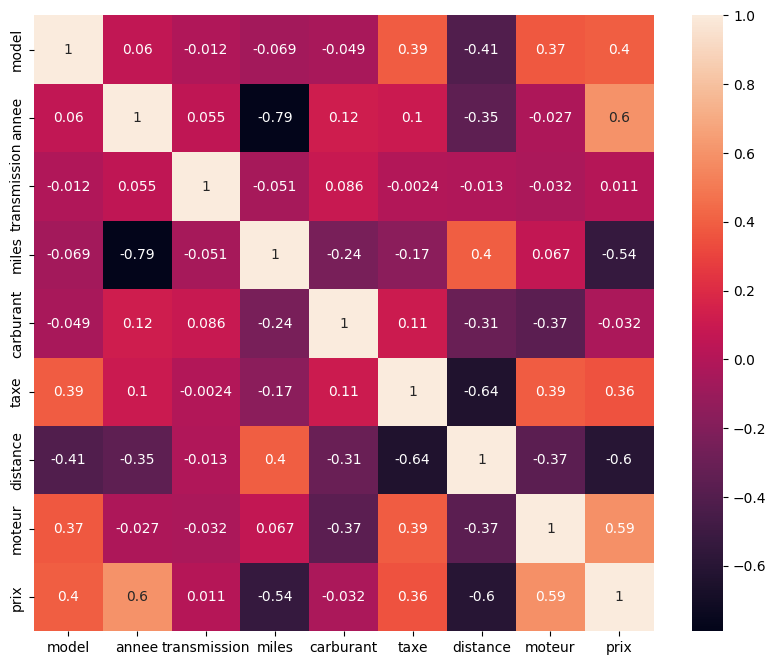

In [ ]:
training_data=pd.concat([X_train,y_train],axis=1)
corr_matrix=training_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
seuil_corr=0.2
var_gardees=corr_matrix[abs(corr_matrix["prix"])>seuil_corr].index
var_gardees

Index(['model', 'annee', 'miles', 'taxe', 'distance', 'moteur', 'prix'], dtype='object')

In [ ]:

import pandas as pd
from scipy.stats import pearsonr

# Assuming 'training_data' DataFrame is already defined as in your previous code
# training_data = pd.concat([X_train, y_train], axis=1)

# Calculate p-values for Pearson correlation
p_values = {}
for col in training_data.columns:
  if col != 'prix':  # Exclude the target variable itself
    correlation, p_value = pearsonr(training_data['prix'], training_data[col])
    p_values[col] = p_value

pd.DataFrame(p_values, index=['p-value']).T


,p-value
model,8.285868e-317
annee,0.000000e+00
transmission,2.928318e-01
miles,0.000000e+00
carburant,3.588279e-03
taxe,1.621770e-249
distance,0.000000e+00
moteur,0.000000e+00


In [ ]:
colonnes_train= X.drop("transmission",axis=1).columns
colonnes_train


Index(['model', 'annee', 'miles', 'carburant', 'taxe', 'distance', 'moteur'], dtype='object')

In [ ]:
X_train.drop("transmission",axis=1,inplace=True)
X_test.drop("transmission",axis=1,inplace=True)
print(X_train.shape)
print(X_test.shape)

(8452, 7)
(2113, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler
my_scaler=StandardScaler()
X_train=my_scaler.fit_transform(X_train)
X_test=my_scaler.transform(X_test)

In [ ]:
assert X_train.shape[1]==X_test.shape[1]

Utiliser linear regression et donner le score en pourcent model.score
decision tree regressor \n
knn
xgboost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)*100

78.54899476390503

In [ ]:
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

tree_model.score(X_test,y_test)*100

90.48144044688289

In [ ]:
knn_model=KNeighborsRegressor()
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)*100

93.70109139280004

In [ ]:
xg_model=XGBRegressor()
xg_model.fit(X_train,y_train)

xg_model.score(X_test,y_test)*100

95.35936117172241

Importance des variables pour le xgboost

model        0.044718
annee        0.212193
miles        0.024535
carburant    0.033638
taxe         0.049100
distance     0.300921
moteur       0.334894
dtype: float32


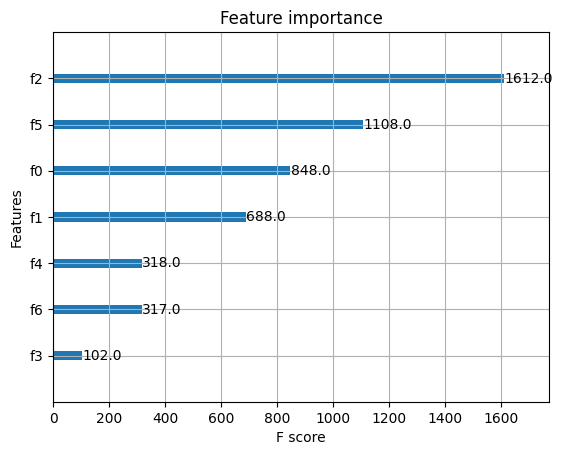

In [ ]:
# Display Feature Importances
import pandas as pd
feature_importances = pd.Series(xg_model.feature_importances_, index=colonnes_train)
print(feature_importances)

# Plot Feature Importances using plot_importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xg_model)
plt.show()

Stacking de xgboost et gradientboost et ridge comme modele de sortie et evaluer le r2 score

In [ ]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

In [ ]:
stackingRegressor = StackingRegressor(
    estimators=[
        ('xgb', xgb.XGBRegressor()),
        ('gbm', GradientBoostingRegressor())
    ],
    final_estimator=Ridge()
)

stackingRegressor.fit(X_train, y_train)


stackingRegressor.score(X_test, y_test)


0.9545265111697346

Tracer la courbe d'apprentissage  r2 score pour train et test pour xgboost

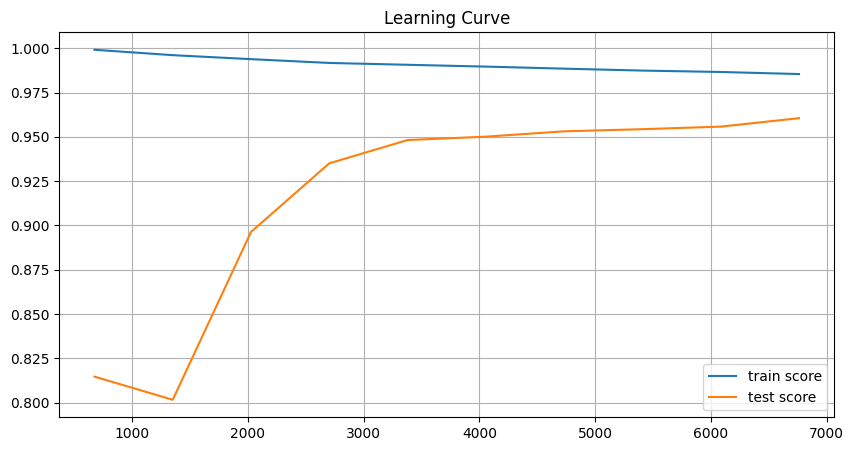

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

def l_curve(model):
  N, train_score, test_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

  plt.figure(figsize=(10, 5))
  plt.grid()
  plt.title('Learning Curve')
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, test_score.mean(axis=1), label='test score')
  plt.legend()
  plt.show()


l_curve(xg_model)

calculer rmse

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = xg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Le RMSE du XGBoost:",rmse)

Le RMSE du XGBoost: 2562.7851060906373


In [ ]:
y_stacking_pred = stackingRegressor.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_stacking_pred)
rmse_stacking = np.sqrt(mse_stacking)

print("Le RMSE du Stacking:",rmse_stacking)

Le RMSE du Stacking: 2536.894079336399
